## Unsupervised Learning Algorithms - EDA PT. 1
### The following script contains the following:

#### 1. Import data libraries, additional requirements
#### 2. Read data sets
#### 3. Merge weather data & pleasant weather answers
#### 4. Look at data from the last decade
#### 5. Perform visual EDA
#### 6. Export all new features of data sets
---------------------------------------------------------------------------------------------------------------------------
### 1. Import data libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
path = r'climatewins-ml'

In [4]:
prediction = pd.read_csv(os.path.join(path, '02 Data Sets', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
prediction

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,...,5,0.88,1.00,0.45,0.34,0,4.70,8.50,6.00,10.90
1,19600102,1,6,2.10,0.84,1.02,0.36,1.05,0,1.10,...,7,0.91,1.00,0.25,0.84,0,0.70,8.90,5.60,12.10
2,19600103,1,8,2.10,0.90,1.02,0.18,0.30,0,0.00,...,7,0.91,1.01,0.17,0.08,0,0.10,10.50,8.10,12.90
3,19600104,1,3,2.10,0.92,1.02,0.58,0.00,0,4.10,...,7,0.86,1.02,0.13,0.98,0,0.00,7.40,7.30,10.60
4,19600105,1,6,2.10,0.95,1.02,0.65,0.14,0,5.40,...,3,0.80,1.03,0.46,0.00,0,5.70,5.70,3.00,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.10,0.79,1.02,1.34,0.22,0,7.70,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50
22946,20221028,10,6,2.10,0.77,1.02,1.34,0.22,0,5.40,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50
22947,20221029,10,4,2.10,0.76,1.02,1.34,0.22,0,6.10,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50
22948,20221030,10,5,2.10,0.80,1.02,1.34,0.22,0,5.80,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50


In [5]:
pleasant = pd.read_csv(os.path.join(path, '02 Data Sets', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---------------------------------------------------------------------------------------------------------------------------

In [6]:
# Merge data sets using (inner join)
df = prediction.merge(pleasant, on='DATE')

In [7]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,...,0,0,0,0,0,0,0,0,0,0
1,19600102,1,6,2.10,0.84,1.02,0.36,1.05,0,1.10,...,0,0,0,0,0,0,0,0,0,0
2,19600103,1,8,2.10,0.90,1.02,0.18,0.30,0,0.00,...,0,0,0,0,0,0,0,0,0,0
3,19600104,1,3,2.10,0.92,1.02,0.58,0.00,0,4.10,...,0,0,0,0,0,0,0,0,0,0
4,19600105,1,6,2.10,0.95,1.02,0.65,0.14,0,5.40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.10,0.79,1.02,1.34,0.22,0,7.70,...,0,0,0,0,0,0,0,0,0,0
22946,20221028,10,6,2.10,0.77,1.02,1.34,0.22,0,5.40,...,0,0,0,0,0,0,0,0,0,0
22947,20221029,10,4,2.10,0.76,1.02,1.34,0.22,0,6.10,...,0,0,0,0,0,0,0,0,0,0
22948,20221030,10,5,2.10,0.80,1.02,1.34,0.22,0,5.80,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Export new merged data set
df.to_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'merge-weather-data.csv'), index=False)

In [9]:
# Check data types
df.dtypes

DATE                            int64
MONTH                           int64
BASEL_cloud_cover               int64
BASEL_wind_speed              float64
BASEL_humidity                float64
                               ...   
MUNCHENB_pleasant_weather       int64
OSLO_pleasant_weather           int64
SONNBLICK_pleasant_weather      int64
STOCKHOLM_pleasant_weather      int64
VALENTIA_pleasant_weather       int64
Length: 185, dtype: object

In [10]:
# Convert the 'DATE' column to string type
df['DATE'] = df['DATE'].astype(str)

# Extract the year from the 'DATE' column and convert it to integer type
df['Year'] = df['DATE'].str[:4].astype(int)

# Filter the DataFrame for the years between 2012 and 2022
features = df[(df['Year'] >= 2012) & (df['Year'] <= 2022)]

# Now filtered_df contains data only for the years between 2012 and 2022

In [11]:
features

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,Year
18993,20120101,1,8,1.90,0.79,1.02,0.32,0.00,0,0.00,...,0,0,0,0,0,0,0,0,0,2012
18994,20120102,1,8,3.10,0.87,1.02,0.18,0.75,0,0.00,...,0,0,0,0,0,0,0,0,0,2012
18995,20120103,1,5,3.10,0.72,1.02,0.53,0.70,0,3.40,...,0,0,0,0,0,0,0,0,0,2012
18996,20120104,1,5,5.10,0.70,1.02,0.45,0.09,0,2.90,...,0,0,0,0,0,0,0,0,0,2012
18997,20120105,1,7,7.80,0.73,1.01,0.26,1.12,0,0.30,...,0,0,0,0,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.10,0.79,1.02,1.34,0.22,0,7.70,...,0,0,0,0,0,0,0,0,0,2022
22946,20221028,10,6,2.10,0.77,1.02,1.34,0.22,0,5.40,...,0,0,0,0,0,0,0,0,0,2022
22947,20221029,10,4,2.10,0.76,1.02,1.34,0.22,0,6.10,...,0,0,0,0,0,0,0,0,0,2022
22948,20221030,10,5,2.10,0.80,1.02,1.34,0.22,0,5.80,...,0,0,0,0,0,0,0,0,0,2022


In [12]:
features_c = features.drop(columns=['MONTH']).copy()
features_c

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,Year
18993,20120101,8,1.90,0.79,1.02,0.32,0.00,0,0.00,11.40,...,0,0,0,0,0,0,0,0,0,2012
18994,20120102,8,3.10,0.87,1.02,0.18,0.75,0,0.00,7.30,...,0,0,0,0,0,0,0,0,0,2012
18995,20120103,5,3.10,0.72,1.02,0.53,0.70,0,3.40,7.20,...,0,0,0,0,0,0,0,0,0,2012
18996,20120104,5,5.10,0.70,1.02,0.45,0.09,0,2.90,6.90,...,0,0,0,0,0,0,0,0,0,2012
18997,20120105,7,7.80,0.73,1.01,0.26,1.12,0,0.30,6.80,...,0,0,0,0,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1,2.10,0.79,1.02,1.34,0.22,0,7.70,15.90,...,0,0,0,0,0,0,0,0,0,2022
22946,20221028,6,2.10,0.77,1.02,1.34,0.22,0,5.40,16.70,...,0,0,0,0,0,0,0,0,0,2022
22947,20221029,4,2.10,0.76,1.02,1.34,0.22,0,6.10,16.70,...,0,0,0,0,0,0,0,0,0,2022
22948,20221030,5,2.10,0.80,1.02,1.34,0.22,0,5.80,15.40,...,0,0,0,0,0,0,0,0,0,2022


In [13]:
# Export newly merged data set features of last decade and without month column
features_c.to_csv(os.path.join(path, '02 Data Sets', 'Unsupervised', 'features-last-decade.csv'), index=False)

In [14]:
# Count of pleasant weather days last decade
features_c['VALENTIA_pleasant_weather'].value_counts(dropna=False)

VALENTIA_pleasant_weather
0    3957
Name: count, dtype: int64

In [15]:
# Overall 60 years
pleasant['VALENTIA_pleasant_weather'].value_counts(dropna=False)

VALENTIA_pleasant_weather
0    21776
1     1174
Name: count, dtype: int64

---------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Scatter Plot of VALENTIA Temperature Mean vs Pleasant Weather')

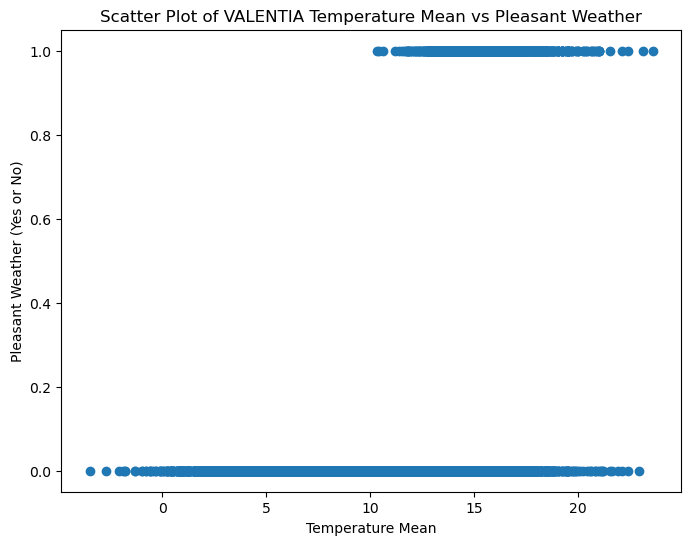

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['VALENTIA_temp_mean'], df['VALENTIA_pleasant_weather'])
plt.xlabel('Temperature Mean')
plt.ylabel('Pleasant Weather (Yes or No)')
plt.title('Scatter Plot of VALENTIA Temperature Mean vs Pleasant Weather')

---------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'VALENTIA Average Temperature Mean by Pleasant Weather')

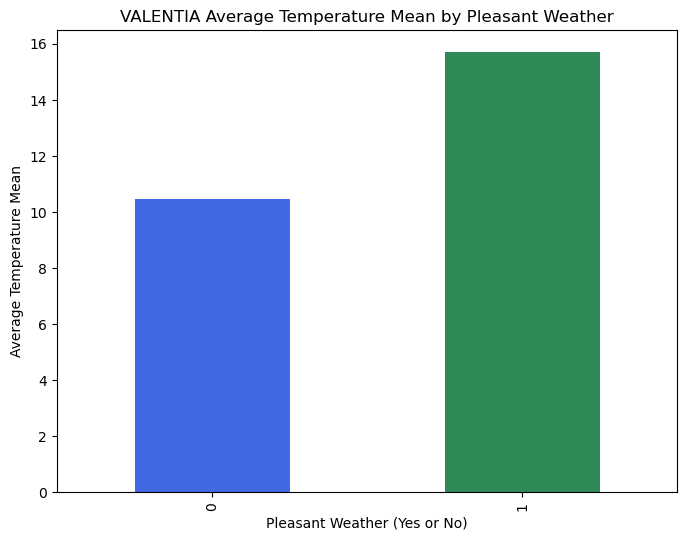

In [17]:
# Calculate the average temperature mean for each category of pleasant weather
mean_temp_by_weather = df.groupby('VALENTIA_pleasant_weather')['VALENTIA_temp_mean'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
mean_temp_by_weather.plot(kind='bar', color=['royalblue', 'seagreen'])  # Assuming blue for 'No' and green for 'Yes'
plt.xlabel('Pleasant Weather (Yes or No)')
plt.ylabel('Average Temperature Mean')
plt.title('VALENTIA Average Temperature Mean by Pleasant Weather')
#plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability
#plt.grid(axis='y')  # Optional: Add grid lines on the y-axis

---------------------------------------------------------------------------------------------------------------------------

In [18]:
# Filter columns ending with '_pleasant_answers' and '_temp_mean'
pleasant_cols = [col for col in df.columns if col.endswith('_pleasant_weather')]
temp_mean_cols = [col for col in df.columns if col.endswith('_temp_mean')]

In [19]:
pleasant_cols

['BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

In [20]:
temp_mean_cols

['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']

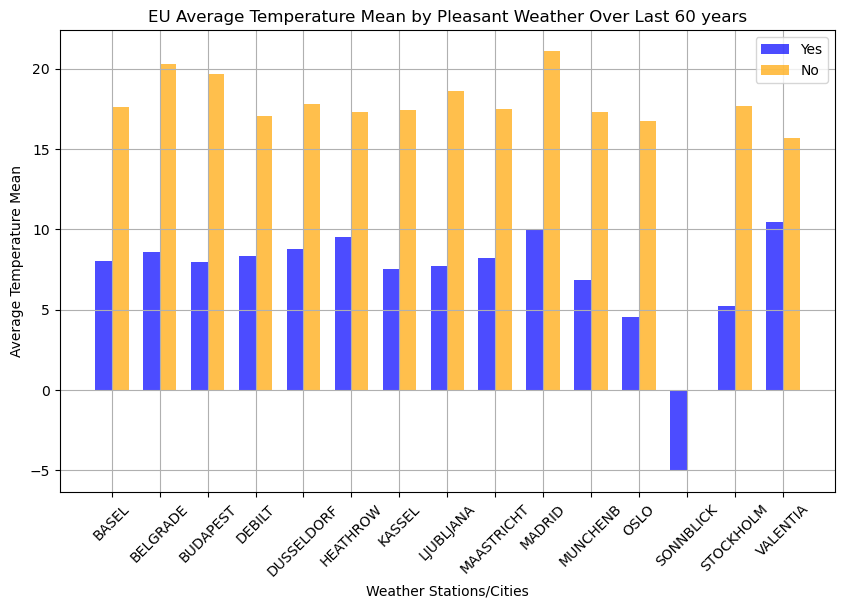

In [29]:
# Calculate the overall average temperature mean for each category of pleasant weather
mean_temp_by_weather = {}
for col in pleasant_data.columns:
    if col.endswith('_pleasant_weather'):
        temp_col = col.replace('_pleasant_weather', '_temp_mean')
        mean_temp_by_weather[col] = temp_mean_data[temp_col][pleasant_data[col] == 1].mean(), temp_mean_data[temp_col][pleasant_data[col] == 0].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Extracting data for plotting
labels = [col.replace('_pleasant_weather', '') for col in mean_temp_by_weather.keys()]
mean_temp_yes = [value[1] for value in mean_temp_by_weather.values()]
mean_temp_no = [value[0] for value in mean_temp_by_weather.values()]

x = range(len(labels))
width = 0.35

# Plot bars for 'Yes' and 'No' pleasant weather answers
plt.bar(x, mean_temp_yes, width, label='Yes', color='blue', alpha=0.7)
plt.bar([i + width for i in x], mean_temp_no, width, label='No', color='orange', alpha=0.7)

plt.xlabel('Weather Stations/Cities')
plt.ylabel('Average Temperature Mean')
plt.title('EU Average Temperature Mean by Pleasant Weather Over Last 60 years')
plt.xticks([i + width / 2 for i in x], labels, rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.grid(True)

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------